In [4]:
path = "C:/Users/debji/Downloads/ch2_xsm_20211111_v1/xsm/data/2021/11/11/calibrated/ch2_xsm_20211111_v1_level2.lc"
from backend.file_handler.handle_types import read_fits
file_response = read_fits(path)
if file_response["good"]:
    matrix = file_response["data"]
else:
    print(file_response["message"])

In [6]:
from backend.core.curve_completion import complete_curve
complete = complete_curve(matrix)

from backend.core.smoothen_curve import moving_average
smooth = moving_average(complete, 300)

In [7]:
from matplotlib import pyplot as plt

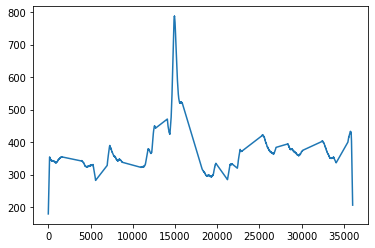

In [8]:
plt.plot(smooth)

In [9]:
from scipy.signal import find_peaks, peak_widths

In [15]:
import numpy as np
x=((np.max(smooth)-np.average(smooth))/3+np.average(smooth))
peaks, p_data = find_peaks(smooth, x, width = 60)

In [19]:
peaks

array([14931, 15728], dtype=int64)

In [22]:
widths = peak_widths(smooth, peaks, 0.97)
widths

(array([35995.31890902,   273.10861992]),
 array([223.67209853, 519.39881003]),
 array([   37.60777467, 15583.11948987]),
 array([36032.92668369, 15856.2281098 ]))

In [25]:
ranges = [
    {
        "range": [
            widths[2][i],
            widths[3][i]
        ],
        "rise_time": peaks[i] - widths[2][i],
        "decay_time": widths[3][i] - peaks[i],
        "peak_flux": smooth[peaks[i]],
        "duration": widths[0][i]
    }
    for i in range(len(peaks))
]

In [26]:
ranges

[{'range': [37.60777467144239, 36032.92668369149],
  'rise_time': 14893.392225328558,
  'decay_time': 21101.92668369149,
  'peak_flux': 786.863818359375,
  'duration': 35995.31890902005},
 {'range': [15583.119489872093, 15856.228109795407],
  'rise_time': 144.88051012790675,
  'decay_time': 128.22810979540736,
  'peak_flux': 523.1142868437929,
  'duration': 273.1086199233141}]